## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Read dataset into a df

In [194]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [136]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Describe Dataset 

In [144]:
df.shape

(6362620, 11)

In [146]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Checking for Null values

In [148]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Checking for unique values in Step, IsFraud and isFlagged columns

In [150]:
df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [151]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [152]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [153]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

### Exploring the records where the system could detect it was fraud

In [155]:
df[df['isFlaggedFraud']==1].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1


In [156]:
df[(df['isFlaggedFraud']==1) & (df['isFraud']==1)].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1


In [158]:
df[(df['isFlaggedFraud']==1) & (df['isFraud']==1)].count()

step              16
type              16
amount            16
nameOrig          16
oldbalanceOrg     16
newbalanceOrig    16
nameDest          16
oldbalanceDest    16
newbalanceDest    16
isFraud           16
isFlaggedFraud    16
dtype: int64

#### This indicates that in the PaySim dataset, only 16 fraud transactions were actually detected by the system

In [160]:
df[(df['isFlaggedFraud']==1) & (df['isFraud']==0)].count()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### This indicates that in the PaySim dataset, non of the non-fraud transactions were incorrectly flaged as Fraud by the system

### Count Number of Fraud Transactions

In [163]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### Exploring Fraud v/s Non-Fraud Transactions

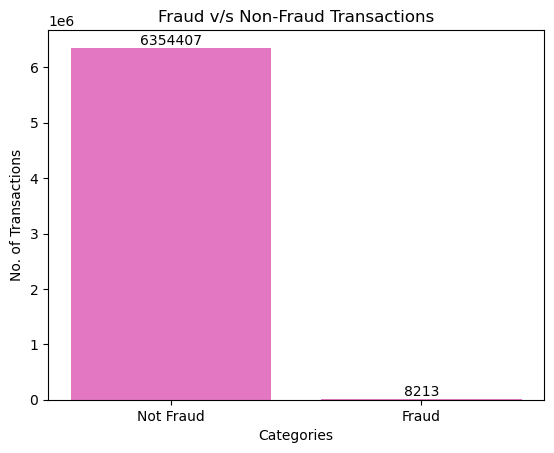

In [165]:
categories = [x for x in dict(df['isFraud'].value_counts())]
values = [x for x in dict(df['isFraud'].value_counts()).values()]
plt.bar(categories, values, color='tab:pink')

plt.title('Fraud v/s Non-Fraud Transactions')
plt.xlabel('Categories')
plt.ylabel('No. of Transactions')

for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(ticks=range(len(categories)), labels=['Not Fraud', 'Fraud'])
plt.show()

### Exploring Transaction Type

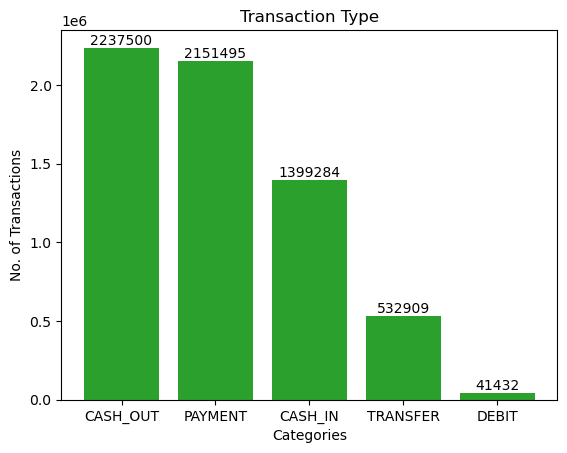

In [171]:
categories = [x for x in dict(df['type'].value_counts())]
values = [x for x in dict(df['type'].value_counts()).values()]
plt.bar(categories, values, color='tab:green')

plt.title('Transaction Type')
plt.xlabel('Categories')
plt.ylabel('No. of Transactions')

for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(ticks=range(len(categories)), labels=[x for x in categories])
plt.show()

### Fraud Transactions per Category

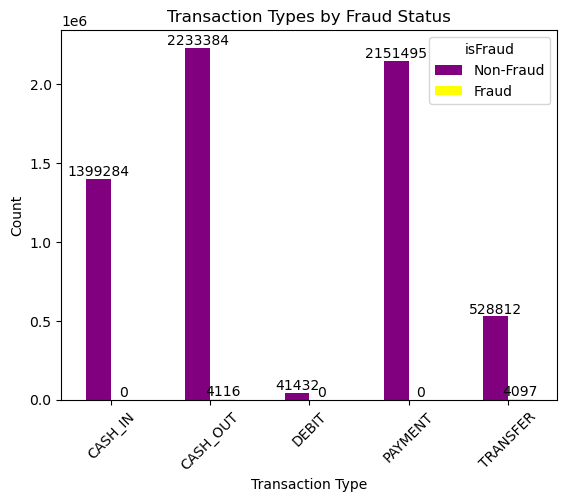

In [176]:

grouped_df = df.groupby(['type', 'isFraud']).size().unstack()


ax = grouped_df.plot(kind='bar', stacked=False, color=['purple', 'yellow'])


plt.title('Transaction Types by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)


for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d', fontsize=10)


plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])

plt.show()


### Fraud Transactions that are Flagged per Category

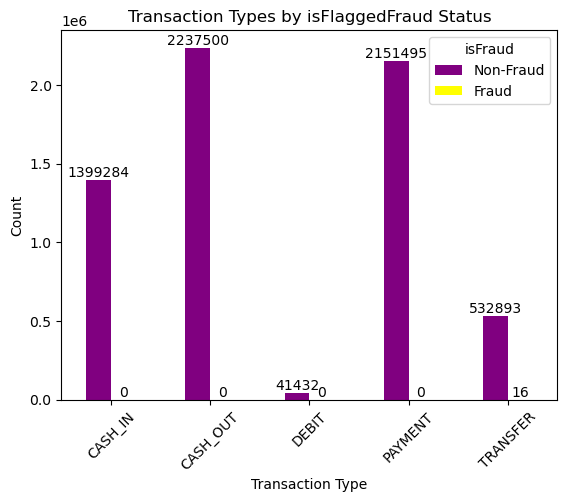

In [181]:

grouped_df = df.groupby(['type', 'isFlaggedFraud']).size().unstack()


ax = grouped_df.plot(kind='bar', stacked=False, color=['purple', 'yellow'])


plt.title('Transaction Types by isFlaggedFraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)


for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d', fontsize=10)


plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])


plt.show()

### Plotting a correlation Matrix

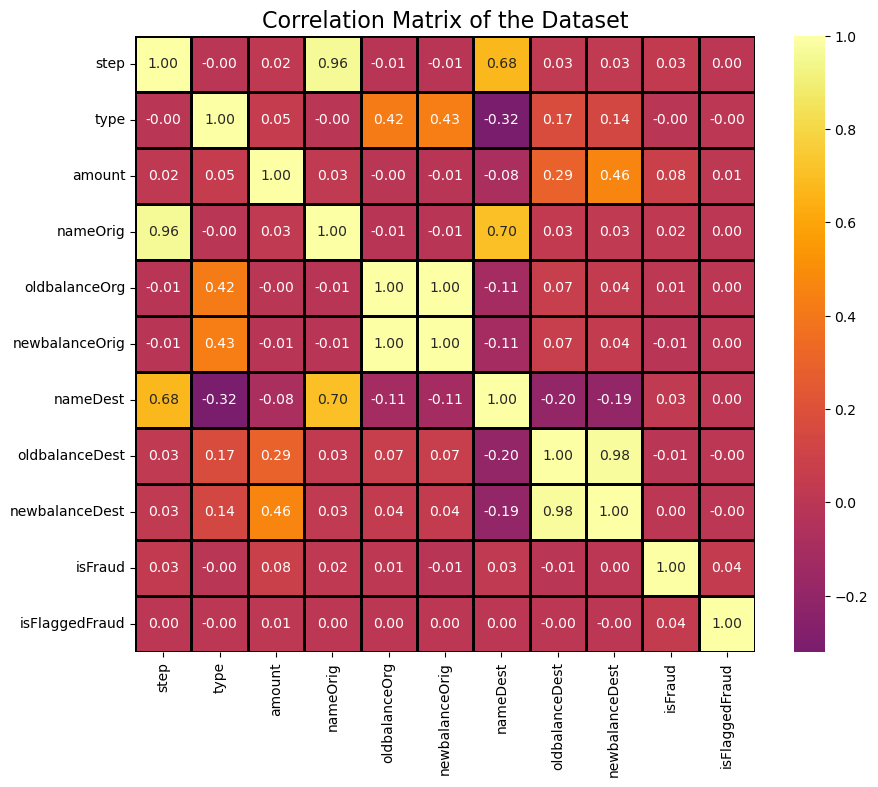

In [188]:
# Converting categorical columns into numerical values for correlation matrix
df_filtered = df
df_filtered['type'] = pd.factorize(df['type'])[0]  
df_filtered['nameOrig'] = pd.factorize(df['nameOrig'])[0]
df_filtered['nameDest'] = pd.factorize(df['nameDest'])[0]

# Calculating the correlation matrix
corr = df_filtered.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='inferno', center=0, linewidths=1, linecolor='black')

# Adding title
plt.title('Correlation Matrix of the Dataset', fontsize=16)

# Displaying the plot
plt.show()


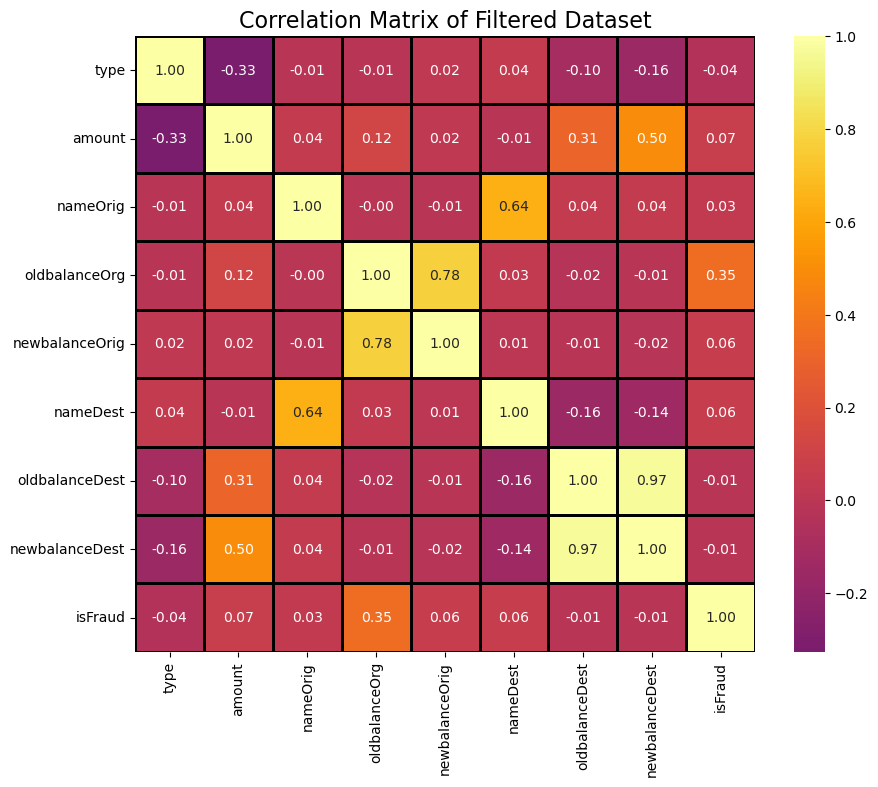

In [200]:
df_filtered = df.loc[df['type'].isin(['TRANSFER','CASH_OUT'])]
df_filtered = df_filtered.loc[df['isFlaggedFraud'] == 0]
df_filtered = df_filtered.drop(['isFlaggedFraud', 'step'], axis =1)
# Converting categorical columns into numerical values for correlation matrix
df_filtered['type'] = pd.factorize(df_filtered['type'])[0]  
df_filtered['nameOrig'] = pd.factorize(df_filtered['nameOrig'])[0]
df_filtered['nameDest'] = pd.factorize(df_filtered['nameDest'])[0]

# Calculating the correlation matrix
corr = df_filtered.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='inferno', center=0, linewidths=1, linecolor='black')

# Adding title
plt.title('Correlation Matrix of Filtered Dataset', fontsize=16)

# Displaying the plot
plt.show()
